In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, f1_score, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/pcos_dataset.csv")

In [ ]:
df.head()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
0,24,34.7,1,25.2,20,0
1,37,26.4,0,57.1,25,0
2,32,23.6,0,92.7,28,0
3,28,28.8,0,63.1,26,0
4,25,22.1,1,59.8,8,0


In [ ]:
df.tail()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
995,34,18.4,1,95.7,23,0
996,45,28.9,1,28.5,7,0
997,37,28.3,0,32.4,28,0
998,41,27.3,0,95.6,9,0
999,22,21.9,1,78.9,7,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        1000 non-null   int64  
 1   BMI                        1000 non-null   float64
 2   Menstrual_Irregularity     1000 non-null   int64  
 3   Testosterone_Level(ng/dL)  1000 non-null   float64
 4   Antral_Follicle_Count      1000 non-null   int64  
 5   PCOS_Diagnosis             1000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 47.0 KB


In [ ]:
df.shape

(1000, 6)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Age,0
BMI,0
Menstrual_Irregularity,0
Testosterone_Level(ng/dL),0
Antral_Follicle_Count,0
PCOS_Diagnosis,0


In [ ]:
df.describe()

,Age,BMI,Menstrual_Irregularity,Testosterone_Level(ng/dL),Antral_Follicle_Count,PCOS_Diagnosis
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.771000,26.38700,0.530000,60.159500,17.469000,0.199000
std,8.463462,4.93554,0.499349,23.160204,7.069301,0.399448
min,18.000000,18.10000,0.000000,20.000000,5.000000,0.000000
25%,24.000000,21.90000,0.000000,41.700000,12.000000,0.000000
50%,32.000000,26.40000,1.000000,60.000000,18.000000,0.000000
75%,39.000000,30.50000,1.000000,80.300000,23.250000,0.000000
max,45.000000,35.00000,1.000000,99.800000,29.000000,1.000000


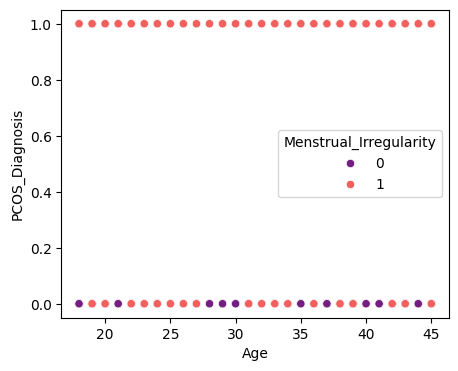

In [ ]:
plt.figure(figsize=(5,4))
ax = sns.scatterplot(x='Age',y='PCOS_Diagnosis',data=df,palette='magma',hue='Menstrual_Irregularity')

Therefore its clear that age does not have much effect.

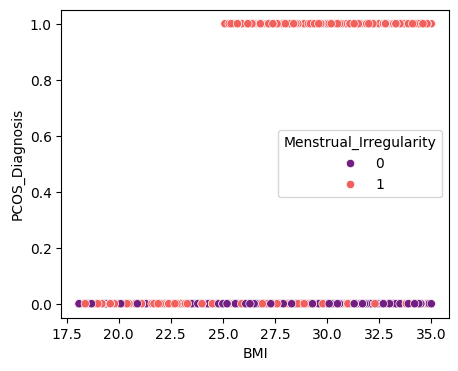

In [ ]:
plt.figure(figsize=(5,4))
ax = sns.scatterplot(x='BMI',y='PCOS_Diagnosis',data=df,palette='magma',hue='Menstrual_Irregularity')

This shows that almost every women with PCOS have irregular periods

Now Histograms are plotted to understand the distribution, skewness, and spread of each numerical feature before applying machine learning models

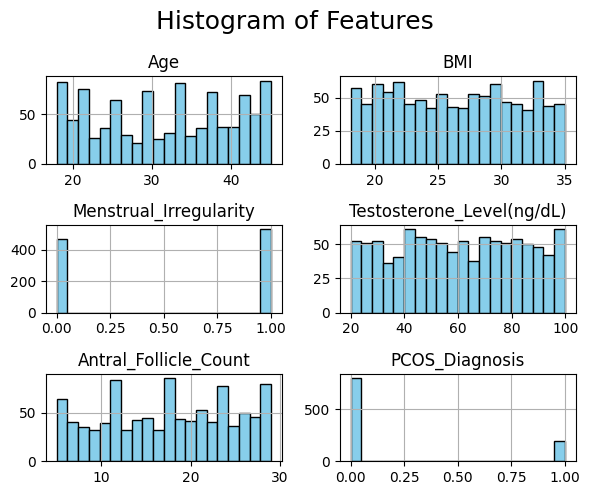

In [ ]:
df.hist(figsize=(6, 5), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histogram of Features", fontsize=18)
plt.tight_layout()
plt.show()

Boxplots are used to compare numerical features across PCOS and non-PCOS groups to identify differences in distribution, medians, and variability.

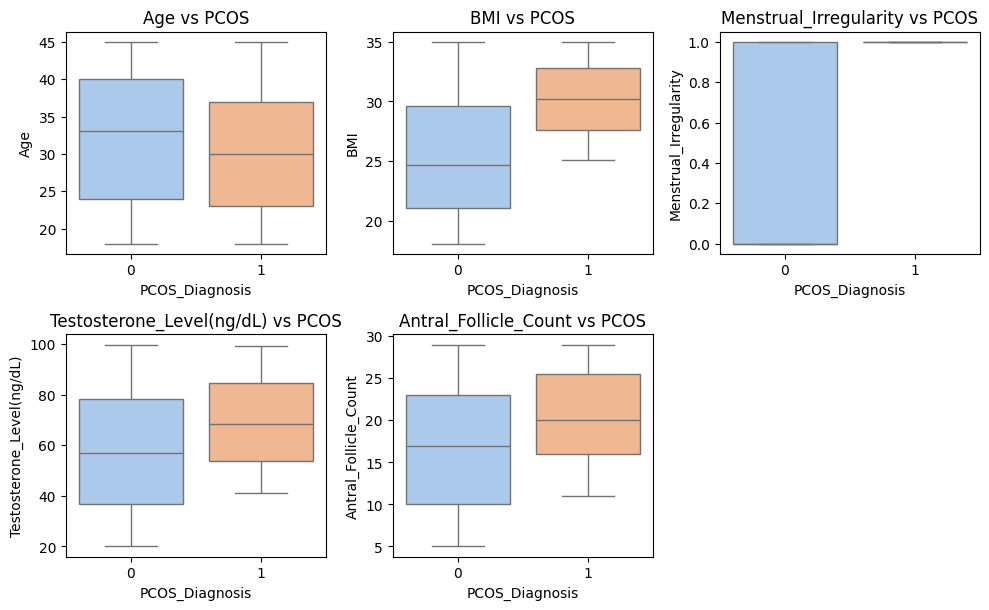

In [ ]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()
numerical_cols.remove('PCOS_Diagnosis')

plt.figure(figsize=(10, 30))
for i, col in enumerate(numerical_cols):
    plt.subplot(10, 3, i+1)
    sns.boxplot(x='PCOS_Diagnosis', y=col, data=df, palette='pastel', hue='PCOS_Diagnosis', legend=False)
    plt.title(f"{col} vs PCOS")
plt.tight_layout()
plt.show()

Correlation Analysis

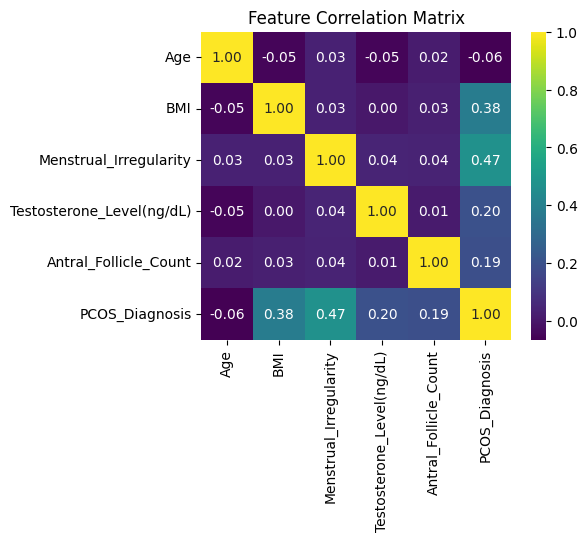

In [ ]:
plt.figure(figsize=(5, 4))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
x = df.drop('PCOS_Diagnosis', axis=1)
y = df['PCOS_Diagnosis']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n=======================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        cm = confusion_matrix(y_train, pred)
        print(f"Confusion Matrix: \n {cm}\n")
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
        plt.title("Train Confusion matrix")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.show()
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n=======================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        cm = confusion_matrix(y_test, pred)
        print(f"Confusion Matrix: \n {cm}\n")
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d")
        plt.title("Test Confusion matrix")
        plt.ylabel("Actual")
        plt.xlabel("Predicted")
        plt.show()

1. LOGISTIC REGRESSION

Train Result:
Accuracy Score: 92.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.948758    0.814103    0.9225    0.881430      0.921827
recall       0.954688    0.793750    0.9225    0.874219      0.922500
f1-score     0.951713    0.803797    0.9225    0.877755      0.922130
support    640.000000  160.000000    0.9225  800.000000    800.000000
_______________________________________________
Confusion Matrix: 
 [[611  29]
 [ 33 127]]



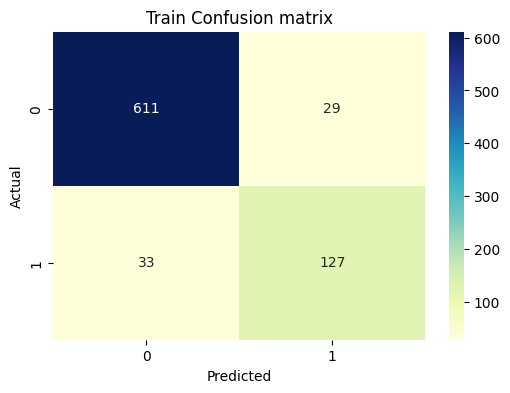

Test Result:
Accuracy Score: 89.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.926380   0.729730      0.89    0.828055      0.888033
recall       0.937888   0.692308      0.89    0.815098      0.890000
f1-score     0.932099   0.710526      0.89    0.821313      0.888892
support    161.000000  39.000000      0.89  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[151  10]
 [ 12  27]]



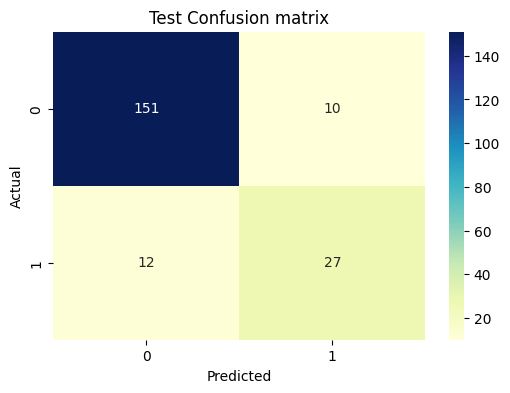

In [ ]:
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(x_train, y_train)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=True)
print_score(lr_clf, x_train, y_train, x_test, y_test, train=False)

2. RANDOM FOREST

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    640.0  160.0       1.0      800.0         800.0
_______________________________________________
Confusion Matrix: 
 [[640   0]
 [  0 160]]



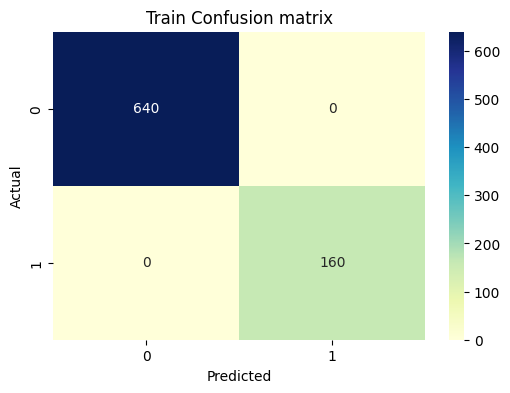

Test Result:
Accuracy Score: 99.00%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.987730   1.000000      0.99    0.993865      0.990123
recall       1.000000   0.948718      0.99    0.974359      0.990000
f1-score     0.993827   0.973684      0.99    0.983756      0.989899
support    161.000000  39.000000      0.99  200.000000    200.000000
_______________________________________________
Confusion Matrix: 
 [[161   0]
 [  2  37]]



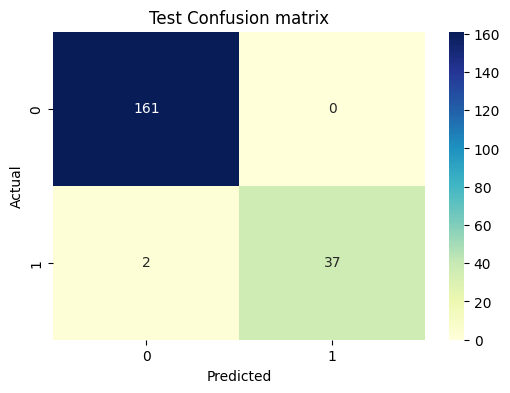

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(x_train, y_train)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

In [ ]:
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   random_state=42, verbose=2)

In [ ]:
importances = rf_random.best_estimator_.feature_importances_
feature_names = x.columns
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

/tmp/ipython-input-1911684785.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')


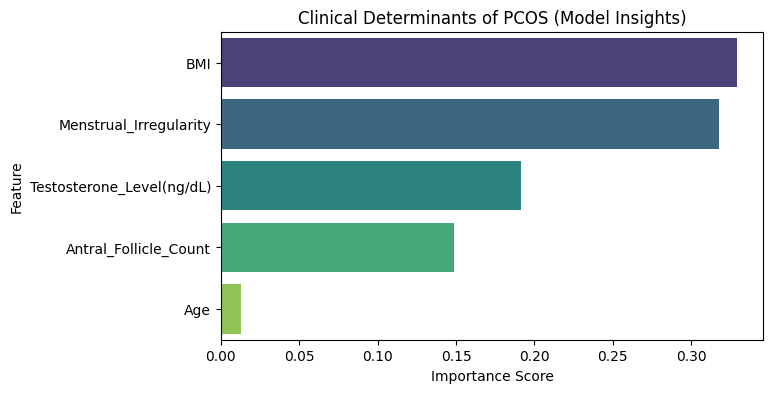

In [ ]:
plt.figure(figsize=(7, 4))
sns.barplot(x='Importance', y='Feature', data=feature_imp_df, palette='viridis')

plt.title('Clinical Determinants of PCOS (Model Insights)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()